<a href="https://colab.research.google.com/github/shadhinaust/Algo/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array, array_to_img
import matplotlib.pyplot as plt
import numpy as np

In [31]:
print(tf.__version__)

2.13.0


Load Dataset

In [53]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

Data Visualization

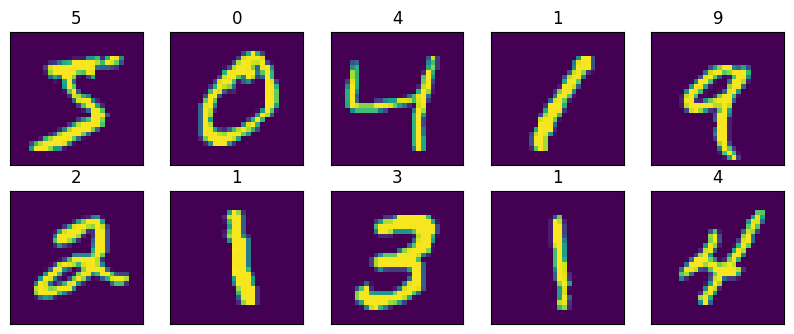

In [54]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])
  plt.imshow(x_train[i])
plt.show()

Data Preprocessing

In [56]:
x_train = x_train.reshape(-1, 28,28,1)
x_test= x_test.reshape (-1,28,28,1)

In [57]:
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])

In [58]:
total_len = len(y_train)
train_len = int(total_len*0.8)
x_train, x_val = x_train[:train_len], x_train[train_len:total_len+1]
y_train, y_val = y_train[:train_len], y_train[train_len:total_len+1]

Configurations

In [59]:
num_classes = 10
input_shape = (32, 32, 1)
batch_size = 32
epochs = 10
fine_tune_layers = 8

Custom CNN

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape = input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 512)         1180160   
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 512)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1130/1500 [=====================>........] - ETA: 2:44 - loss: 1.8073 - accuracy: 0.3562

In [ ]:
model.save("mnist_cnn.h5")

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.title('CNN With MNIST')
plt.legend()
plt.show()
plt.save('mnist_cnn.png')

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("CNN With MNIST, accuracy: {:5.2f}%".format(100 * acc))

VGG16

In [ ]:
base_model = VGG16(input_shape=input_shape,
                   include_top=False,
                   weights=None)
base_model.trainable = True
base_model.summary()

In [40]:
num_layers = len(base_model.layers)
for model_layer in base_model.layers[:num_layers - fine_tune_layers]:
    model_layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

# New Section

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

In [ ]:
model.save("mnist_vgg16.h5")

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.title('VGG16 With MNIST')
plt.legend()
plt.show()
plt.save('mnist_vgg16.png')

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("VGG16 With MNIST, accuracy: {:5.2f}%".format(100 * acc))

ResNet50

In [ ]:
base_model = ResNet50(input_shape=input_shape,
                   include_top=False,
                   weights=None)
base_model.trainable = True
base_model.summary()

In [ ]:
num_layers = len(base_model.layers)
for model_layer in base_model.layers[:num_layers - fine_tune_layers]:
    model_layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

In [ ]:
model.save("mnist_resnet50.h5")

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.title('ResNet50 With MNIST')
plt.legend()
plt.show()
plt.save('mnist_resnet50.png')

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("ResNet50 With MNIST, accuracy: {:5.2f}%".format(100 * acc))